# titanic.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk
import sklearn.model_selection as skm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score

## KNN

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.Sex = df.Sex.apply(lambda x: 0 if x == 'female' else 1)

In [5]:
df = df.drop(labels=['Cabin', 'Embarked', 'Name', 'PassengerId', 'Ticket'], axis=1)

In [6]:
df = df.dropna()

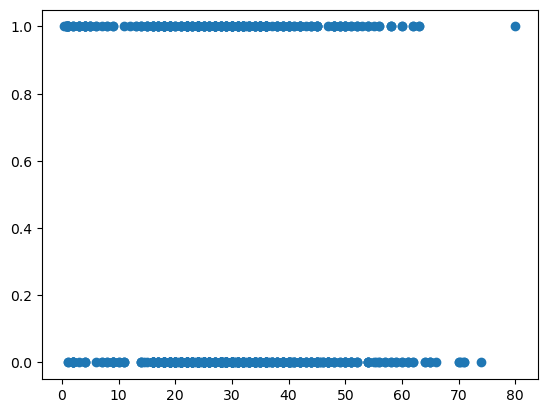

In [7]:
plt.scatter(df.Age, df.Survived)

In [8]:
train, test = skm.train_test_split(df, test_size=0.2, random_state = 0)

In [9]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
387,1,2,0,36.0,0,0,13.0000
685,0,2,1,25.0,1,2,41.5792
20,0,2,1,35.0,0,0,26.0000
331,0,1,1,45.5,0,0,28.5000
396,0,3,0,31.0,0,0,7.8542
...,...,...,...,...,...,...,...
883,0,2,1,28.0,0,0,10.5000
238,0,2,1,19.0,0,0,10.5000
789,0,1,1,46.0,0,0,79.2000
704,0,3,1,26.0,1,0,7.8542


In [10]:
train.corr()['Survived']

Survived    1.000000
Pclass     -0.351434
Sex        -0.525069
Age        -0.078050
SibSp      -0.009122
Parch       0.118720
Fare        0.280028
Name: Survived, dtype: float64

In [11]:
y_train = train.Survived
y_test = test.Survived
X_train = train.drop('Survived', axis = 1)
X_test = test.drop('Survived', axis = 1)

### k = 1

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
pred

c:\Users\ragas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

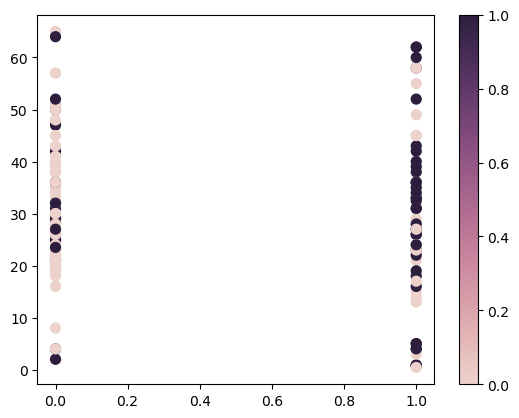

In [13]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    y_test, X_test.Age, c=pred, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

### k = 2

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
pred

c:\Users\ragas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

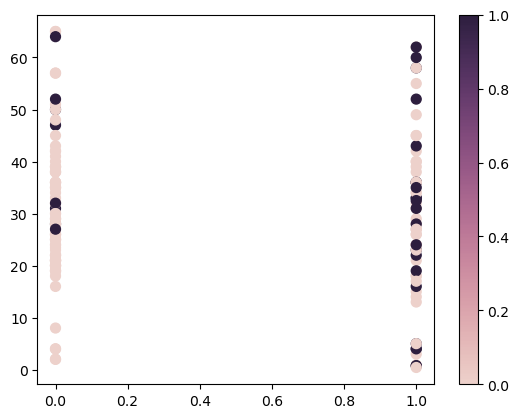

In [15]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    y_test, X_test.Age, c=pred, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

### k = 3

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [27]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
pred = knn_model.predict(X_test)
pred

c:\Users\ragas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

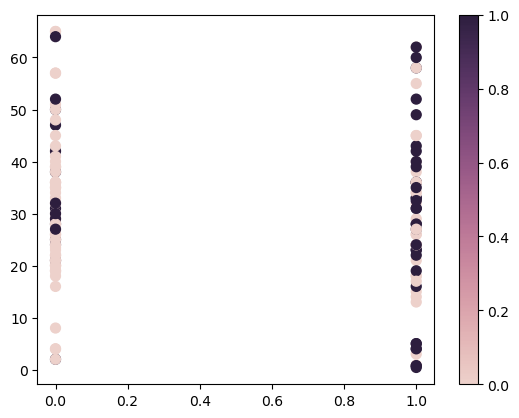

In [29]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    y_test, X_test.Age, c=pred, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

## Decision Tree

In [30]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
clf.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

[Text(0.35007248711340205, 0.9722222222222222, 'X[1] <= 0.5\ngini = 0.478\nsamples = 571\nvalue = [345, 226]'),
 Text(0.16688144329896906, 0.9166666666666666, 'X[0] <= 2.5\ngini = 0.385\nsamples = 204\nvalue = [53, 151]'),
 Text(0.06701030927835051, 0.8611111111111112, 'X[5] <= 26.125\ngini = 0.08\nsamples = 120\nvalue = [5, 115]'),
 Text(0.041237113402061855, 0.8055555555555556, 'X[4] <= 0.5\ngini = 0.172\nsamples = 42\nvalue = [4, 38]'),
 Text(0.030927835051546393, 0.75, 'X[5] <= 12.825\ngini = 0.213\nsamples = 33\nvalue = [4, 29]'),
 Text(0.020618556701030927, 0.6944444444444444, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.041237113402061855, 0.6944444444444444, 'X[2] <= 27.5\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.020618556701030927, 0.6388888888888888, 'X[5] <= 13.396\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.010309278350515464, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.030927835051546393, 0.5833333333333334, 'X[2] 

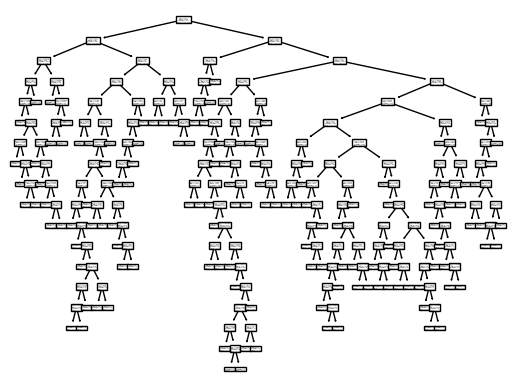

In [25]:
tree.plot_tree(clf)

## Naive Bayes

In [28]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [29]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

## SVM